In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("predictive_maintenance.csv")
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [3]:
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [5]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [6]:
## How many data points are recorded in the dataset?
len(data)

10000

In [7]:
## What are the first few records like? What types of data are present in each column?
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [8]:
##  What are the different types of equipment being monitored?
data['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [14]:
##  How many unique machines/components are represented in the data?
len(data['Product ID'].unique())

10000

In [15]:
##  What is the average and standard deviation of the ambient temperature?
print(data['Air temperature [K]'].mean())
print(data['Air temperature [K]'].std())

300.00493
2.000258682915751


In [16]:
##  When does the process temperature exceed a critical threshold? 
data[data['Process temperature [K]']>100]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [19]:
## What are the characteristics of the failed equipment?
data[data['Failure Type'].notnull()]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [20]:
##  Which machines haveexperienced high levels of tool wear? 
data[data['Tool wear [min]'] > 1000]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


In [21]:
## Which equipment type is most frequently monitored?
data.groupby('Type').size()

Type
H    1003
L    6000
M    2997
dtype: int64

In [22]:
## Are there significant variations in average torque across different machines? 
data.groupby('Product ID')['Torque [Nm]'].mean()

Product ID
H29424    23.9
H29425    44.3
H29432    54.5
H29434    42.7
H29441    24.6
          ... 
M24849    33.2
M24851    26.1
M24855    29.5
M24857    33.4
M24859    40.2
Name: Torque [Nm], Length: 10000, dtype: float64

In [26]:
## Which machines exhibit the highest levels of tool wear? 
data.groupby('Product ID')['Tool wear [min]'].max()

Product ID
H29424    24
H29425    29
H29432    50
H29434    58
H29441    77
          ..
M24849     0
M24851     5
M24855    14
M24857    22
M24859    30
Name: Tool wear [min], Length: 10000, dtype: int64

In [27]:
##  What are the average rotational speeds for different equipment types? 
data.groupby('Type')['Rotational speed [rpm]'].mean()

Type
H    1538.147557
L    1539.469167
M    1537.598932
Name: Rotational speed [rpm], dtype: float64

In [28]:
##  What are the top 10 machines operating at the highest rotational speeds? 
data.sort_values(by='Tool wear [min]').head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
7256,7257,H36670,H,300.2,310.3,1408,42.5,0,0,No Failure
503,504,M15363,M,297.6,309.2,1442,48.1,0,0,No Failure
7168,7169,L54348,L,300.3,310.3,1704,29.5,0,0,No Failure
7088,7089,M21948,M,300.6,310.3,1614,32.7,0,0,No Failure
7005,7006,M21865,M,300.6,310.7,1339,52.9,0,0,No Failure
6926,6927,H36340,H,301.1,311.6,1417,53.4,0,0,No Failure
6845,6846,M21705,M,301.3,311.5,1648,32.4,0,0,No Failure
6760,6761,L53940,L,301.5,310.9,1451,40.6,0,0,No Failure
6678,6679,M21538,M,301.5,310.7,1336,65.6,0,1,Power Failure


In [29]:
## What is the rank of each machine's tool wear within its own product group?
data['Tool_Wear_Rank'] = data.groupby('Product ID')['Tool wear [min]'].rank(ascending=False)

In [30]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Tool_Wear_Rank
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,1.0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,1.0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,1.0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,1.0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,1.0


In [32]:
## Are there any missing values in the data?
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
Tool_Wear_Rank             0
dtype: int64

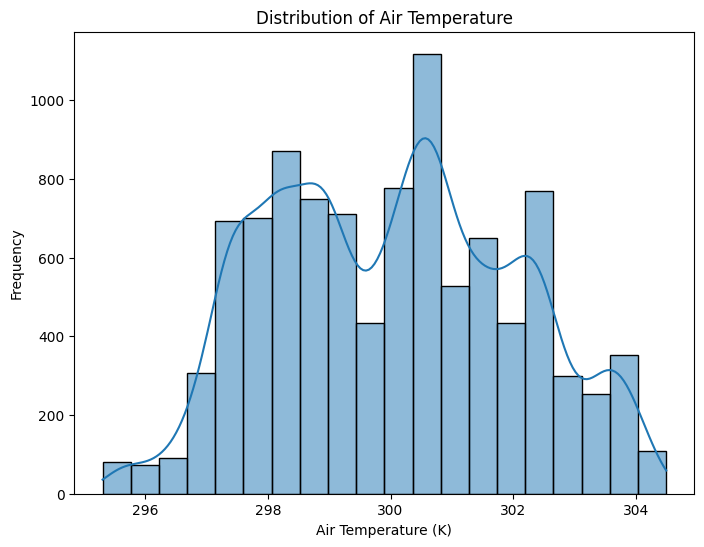

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Histogram of Air Temperature
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Air temperature [K]', bins=20, kde=True) 
plt.title('Distribution of Air Temperature')
plt.xlabel('Air Temperature (K)')
plt.ylabel('Frequency')
plt.show()

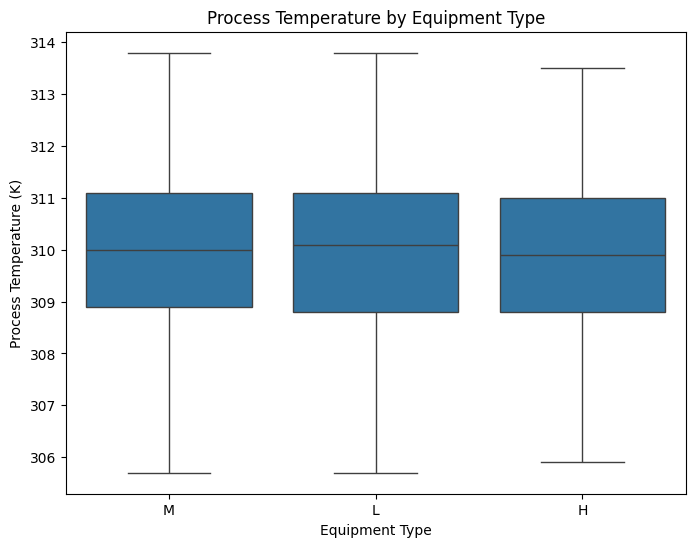

In [7]:
# 2. Boxplot of Process Temperature by Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Type', y='Process temperature [K]', data=data)
plt.title('Process Temperature by Equipment Type')
plt.xlabel('Equipment Type')
plt.ylabel('Process Temperature (K)')
plt.show()

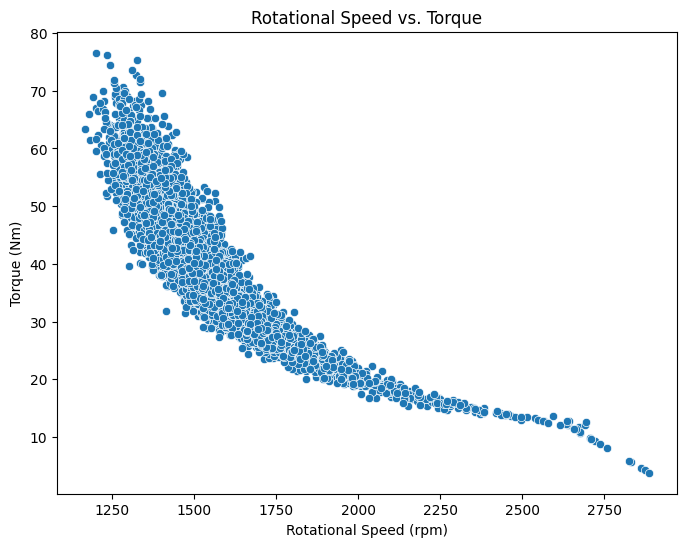

In [9]:
# 3. Scatter Plot of Rotational Speed vs. Torque
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', data=data)
plt.title('Rotational Speed vs. Torque')
plt.xlabel('Rotational Speed (rpm)')
plt.ylabel('Torque (Nm)')
plt.show()


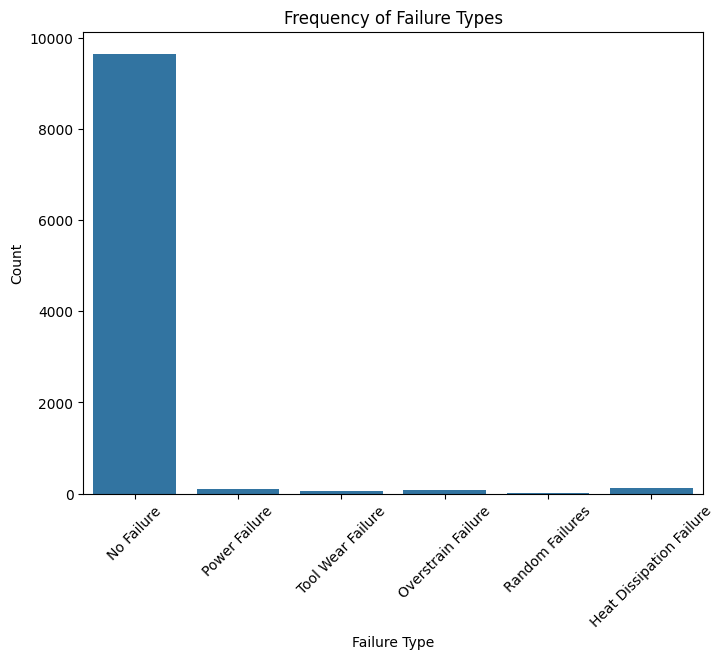

In [10]:
# 4. Bar Plot of Failure Types
plt.figure(figsize=(8, 6))
sns.countplot(x='Failure Type', data=data)
plt.title('Frequency of Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()


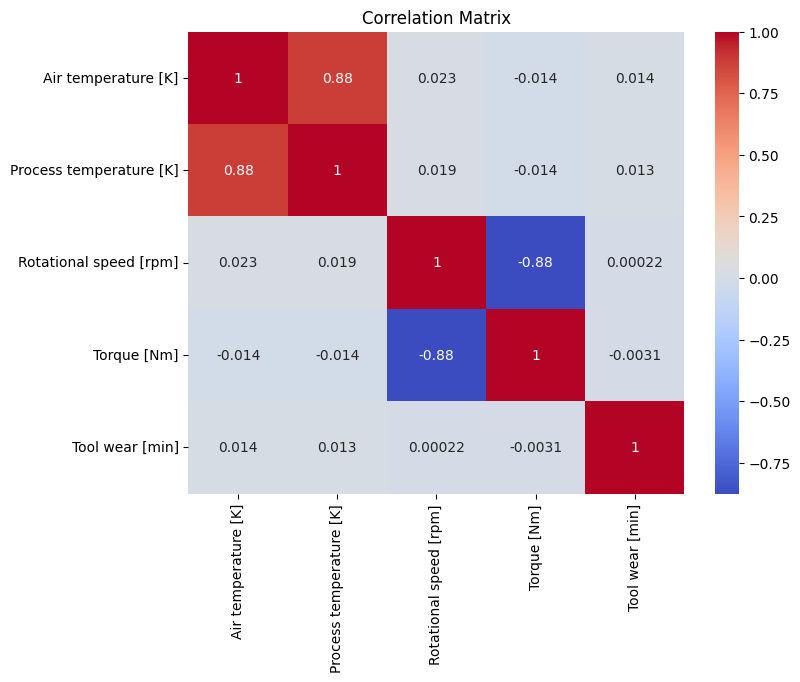

In [11]:
# 5. Correlation Matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
